In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 6s 0us/step


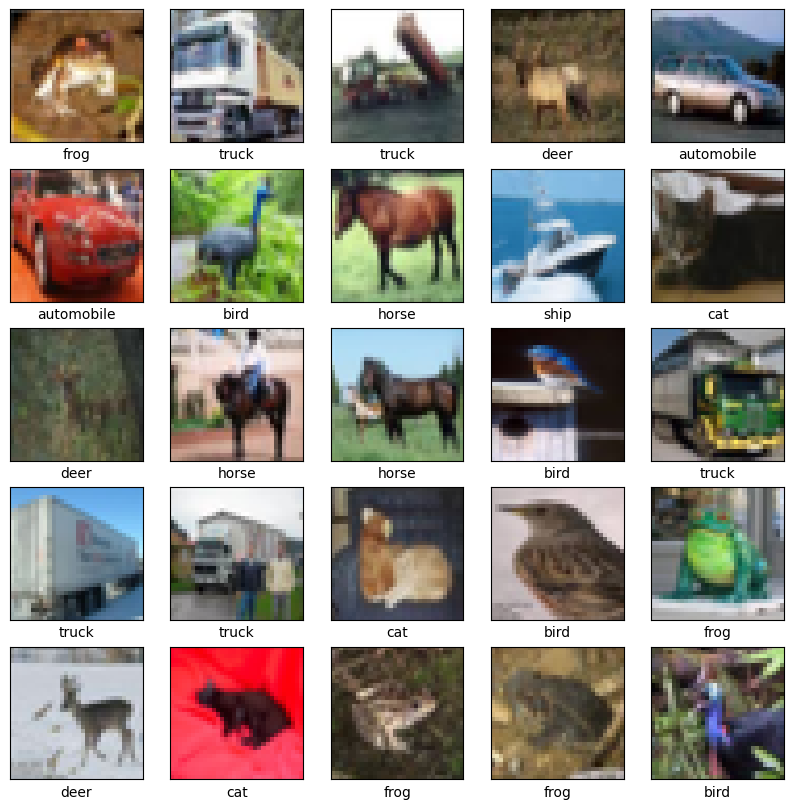

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [5]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 61s 38ms/step - loss: 1.5194 - accuracy: 0.4455 - val_loss: 1.2495 - val_accuracy: 0.5472
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1586 - accuracy: 0.5896 - val_loss: 1.1418 - val_accuracy: 0.5906
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0192 - accuracy: 0.6426 - val_loss: 0.9833 - val_accuracy: 0.6576
Epoch 4/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9263 - accuracy: 0.6752 - val_loss: 0.9629 - val_accuracy: 0.6629
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8468 - accuracy: 0.7034 - val_loss: 0.9257 - val_accuracy: 0.6784
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7860 - accuracy: 0.7258 - val_loss: 0.9045 - val_accuracy: 0.6862
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7399 - accuracy: 0.7414 - val_loss: 0.8754 -

313/313 - 4s - loss: 0.8713 - accuracy: 0.7095 - 4s/epoch - 13ms/step


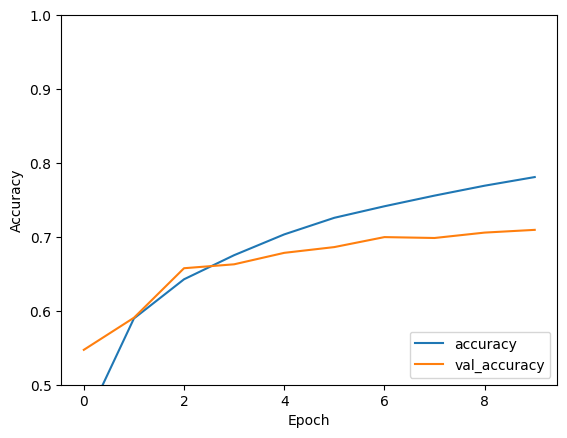

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [7]:
print(test_acc)

0.7095000147819519


In [8]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
[l, x, y, z] = train_images.shape
for i in range(l):
  im = cv2.filter2D(train_images[i], -1, kernel)
  train_images[i] = im

[a, b, c, d] = test_images.shape
for j in range(a):
  im = cv2.filter2D(test_images[j], -1, kernel)
  test_images[j] = im

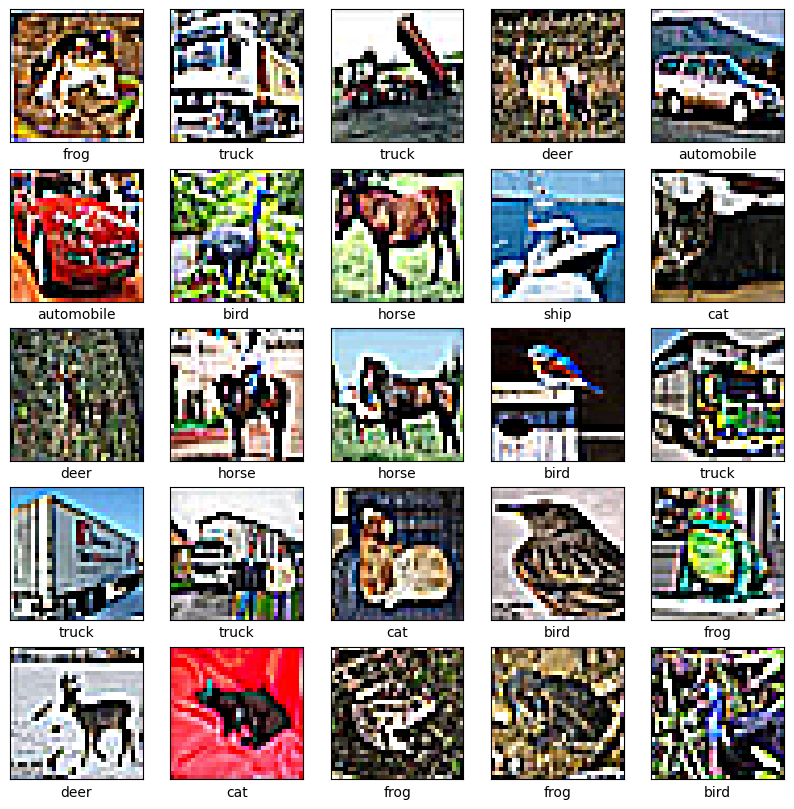

In [9]:
%%capture --no-display

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [10]:
new_model = models.Sequential()
new_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
new_model.add(layers.Flatten())
new_model.add(layers.Dense(64, activation='relu'))
new_model.add(layers.Dense(10))

In [11]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [12]:
new_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

new_history = new_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.3848 - accuracy: 0.5025 - val_loss: 1.0533 - val_accuracy: 0.6331
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9793 - accuracy: 0.6581 - val_loss: 0.9823 - val_accuracy: 0.6620
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8529 - accuracy: 0.7032 - val_loss: 0.9230 - val_accuracy: 0.6837
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7706 - accuracy: 0.7310 - val_loss: 0.8517 - val_accuracy: 0.7096
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7028 - accuracy: 0.7543 - val_loss: 0.8465 - val_accuracy: 0.7144
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6434 - accuracy: 0.7732 - val_loss: 0.8603 - val_accuracy: 0.7135
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.5988 - accuracy: 0.7881 - val_loss: 0.8367 -

313/313 - 3s - loss: 0.9215 - accuracy: 0.7206 - 3s/epoch - 10ms/step


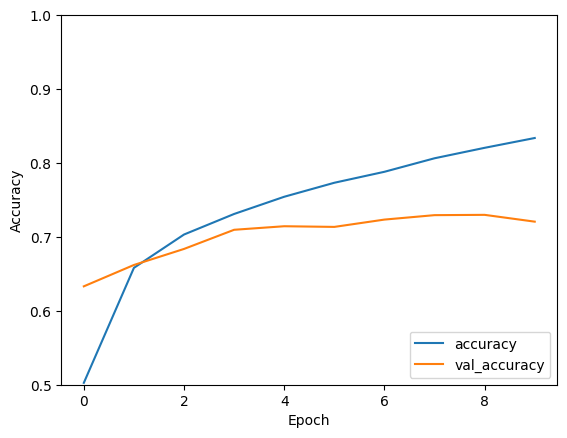

In [13]:
plt.plot(new_history.history['accuracy'], label='accuracy')
plt.plot(new_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

new_test_loss, new_test_acc = new_model.evaluate(test_images,  test_labels, verbose=2)

In [14]:
print(new_test_acc)

0.7206000089645386


# Trabalho Final de PDI

## Equipe:
### Eike Stálei Vieira Neves
### Iarah Gonçalves de Almeida
### Vinícius Rodrigues Souza
### Thiago Emanuel Silva Antunes Lopes

# Obrigada